#### 1. Data collection

In [194]:
import FinanceDataReader as fdr
import html5lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [195]:
# KOSPI index, 2009 ~ Now
kospi = fdr.DataReader('KS11', '2009-01-01')

# Indexes, 2009 ~ Now
dji = fdr.DataReader('DJI', '2009-01-01') # Dow Jones Industrial(DJI)
sp500 = fdr.DataReader('US500', '2009-01-01') # S&P 500 지수 (NYSE)

# FX 환율, 2009 ~ 현재
usdkrw = fdr.DataReader('USD/KRW', '2009-01-01') # 달러 원화
usdeur = fdr.DataReader('USD/EUR', '2009-01-01') # 달러 유로화
usdcny = fdr.DataReader('USD/CNY', '2009-01-01') # 달러 위엔화

# 상품 선물 가격 데이터
gold = fdr.DataReader('ZG', '2009-01-01') # 금 선물 (ICE)

# 채권 수익률
kr1yt = fdr.DataReader('KR1YT=RR', '2009-01-01') # 1년만기 한국국채 수익률
kr10yt = fdr.DataReader('KR10YT=RR', '2009-01-01') # 10년만기 한국국채 수익률
us1yt = fdr.DataReader('US1MT=X', '2009-01-01') # 1개월 만기 미국국채 수익률
us10yt = fdr.DataReader('US10YT=X', '2009-01-01') # 10년 만기 미국국채 수익률

# FRED 데이터
nasdaq = fdr.DataReader('NASDAQCOM', '2009-01-01', data_source='fred') # NASDAQCOM 나스닥종합지수
# hou_nas = fdr.DataReader(['HSN1F', 'NASDAQCOM'], data_source='fred') # HSN1F 주택판매지수, NASDAQCOM 나스닥종합지수

sse = fdr.DataReader('005930', '2009-01-01')

#### 2. Preprocessing

In [196]:
kospi_m = pd.DataFrame(data=kospi.Close.values, columns=['kospi'], index=kospi.index)
dji_m = pd.DataFrame(data=dji.Close.values, columns=['dji'], index=dji.index)
sp500_m = pd.DataFrame(data=sp500.Close.values, columns=['sp500'], index=sp500.index)

usdkrw_m = pd.DataFrame(data=usdkrw.Close.values, columns=['usdkrw'], index=usdkrw.index)
usdeur_m = pd.DataFrame(data=usdeur.Close.values, columns=['usdeur'], index=usdeur.index)
usdcny_m = pd.DataFrame(data=usdcny.Close.values, columns=['usdcny'], index=usdcny.index)

gold_m = pd.DataFrame(data=gold.Close.values, columns=['gold'], index=gold.index)

kr1yt_m = pd.DataFrame(data=kr1yt.Close.values, columns=['kr1yt'], index=kr1yt.index)
kr10yt_m = pd.DataFrame(data=kr10yt.Close.values, columns=['kr10yt'], index=kr10yt.index)
us1yt_m = pd.DataFrame(data=us1yt.Close.values, columns=['us1yt'], index=us1yt.index)
us10yt_m = pd.DataFrame(data=us10yt.Close.values, columns=['us10yt'], index=us10yt.index)

nasdaq_m = pd.DataFrame(data=nasdaq.NASDAQCOM.values, columns=['nasdaq'], index=nasdaq.index)

sse_m = pd.DataFrame(data=sse.Close.values, columns=['sse'], index=sse.index)

In [197]:
x_columns = [kospi_m, dji_m, sp500_m, usdkrw_m, usdeur_m, usdcny_m, gold_m, \
             kr1yt_m, kr10yt_m, us1yt_m, us10yt_m, nasdaq_m, sse_m]

In [198]:
df = pd.concat(x_columns, axis=1)

In [199]:
df.head()

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
2009-01-01,NaN,NaN,NaN,1263.0,0.7147,6.8230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,1157.40,9034.69,931.80,1321.0,0.7206,6.8230,878.8,3.17,4.23,0.020,2.361,1632.21,9400.0
2009-01-05,1173.57,8952.89,927.45,1315.0,0.7350,6.8305,857.2,2.93,4.22,0.046,2.485,1628.03,9520.0
2009-01-06,1194.28,9015.10,934.70,1312.0,0.7401,6.8365,865.4,2.88,4.26,0.041,2.450,1652.38,9960.0
2009-01-07,1228.17,8769.70,906.65,1292.7,0.7333,6.8335,841.1,2.95,4.31,0.051,2.498,1599.06,10480.0


In [200]:
# df_dropna = df.dropna(axis=0, how='any')
df_dropna = df.fillna(method='ffill')

In [201]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4404 entries, 2009-01-01 to 2022-06-15
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kospi   4403 non-null   float64
 1   dji     4403 non-null   float64
 2   sp500   4403 non-null   float64
 3   usdkrw  4404 non-null   float64
 4   usdeur  4404 non-null   float64
 5   usdcny  4404 non-null   float64
 6   gold    4403 non-null   float64
 7   kr1yt   4403 non-null   float64
 8   kr10yt  4403 non-null   float64
 9   us1yt   4403 non-null   float64
 10  us10yt  4403 non-null   float64
 11  nasdaq  4403 non-null   float64
 12  sse     4403 non-null   float64
dtypes: float64(13)
memory usage: 481.7 KB


In [202]:
df_dropna = df_dropna.drop(['2009-01-01'])

In [203]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4403 entries, 2009-01-02 to 2022-06-15
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kospi   4403 non-null   float64
 1   dji     4403 non-null   float64
 2   sp500   4403 non-null   float64
 3   usdkrw  4403 non-null   float64
 4   usdeur  4403 non-null   float64
 5   usdcny  4403 non-null   float64
 6   gold    4403 non-null   float64
 7   kr1yt   4403 non-null   float64
 8   kr10yt  4403 non-null   float64
 9   us1yt   4403 non-null   float64
 10  us10yt  4403 non-null   float64
 11  nasdaq  4403 non-null   float64
 12  sse     4403 non-null   float64
dtypes: float64(13)
memory usage: 481.6 KB


In [204]:
full_df = df_dropna.reset_index()

In [205]:
full_df.head()

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,us10yt,nasdaq,sse
0,2009-01-02,1157.40,9034.69,931.80,1321.0,0.7206,6.8230,878.8,3.17,4.23,0.020,2.361,1632.21,9400.0
1,2009-01-05,1173.57,8952.89,927.45,1315.0,0.7350,6.8305,857.2,2.93,4.22,0.046,2.485,1628.03,9520.0
2,2009-01-06,1194.28,9015.10,934.70,1312.0,0.7401,6.8365,865.4,2.88,4.26,0.041,2.450,1652.38,9960.0
3,2009-01-07,1228.17,8769.70,906.65,1292.7,0.7333,6.8335,841.1,2.95,4.31,0.051,2.498,1599.06,10480.0
4,2009-01-08,1205.70,8742.46,909.73,1330.0,0.7286,6.8347,853.9,2.84,4.20,0.041,2.445,1617.01,10160.0


In [206]:
# add features based on technical indicators

# simple moving average
full_df['sma5'] = full_df['kospi'].rolling(5).mean()
full_df['sma20'] = full_df['kospi'].rolling(20).mean()
full_df['sma100'] = full_df['kospi'].rolling(100).mean()
full_df['sma200'] = full_df['kospi'].rolling(200).mean()

# exponential moving average
# (Calculate moving average while weighting recent values)
full_df['ema5'] = full_df['kospi'].rolling(5).mean()
full_df['ema20'] = full_df['kospi'].rolling(20).mean()
full_df['ema100'] = full_df['kospi'].rolling(100).mean()
full_df['ema200'] = full_df['kospi'].rolling(200).mean()

In [207]:
full_df.head(20)

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
0,2009-01-02,1157.40,9034.69,931.80,1321.00,0.7206,6.8230,878.8,3.17,4.23,...,1632.21,9400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,1173.57,8952.89,927.45,1315.00,0.7350,6.8305,857.2,2.93,4.22,...,1628.03,9520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,1194.28,9015.10,934.70,1312.00,0.7401,6.8365,865.4,2.88,4.26,...,1652.38,9960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,1228.17,8769.70,906.65,1292.70,0.7333,6.8335,841.1,2.95,4.31,...,1599.06,10480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,1205.70,8742.46,909.73,1330.00,0.7286,6.8347,853.9,2.84,4.20,...,1617.01,10160.0,1191.824,NaN,NaN,NaN,1191.824,NaN,NaN,NaN
5,2009-01-09,1180.96,8599.18,890.35,1348.50,0.7444,6.8355,854.3,2.70,4.32,...,1571.59,9860.0,1196.536,NaN,NaN,NaN,1196.536,NaN,NaN,NaN
6,2009-01-12,1156.75,8473.97,870.26,1354.55,0.7478,6.8366,820.3,2.85,4.37,...,1538.79,9790.0,1193.172,NaN,NaN,NaN,1193.172,NaN,NaN,NaN
7,2009-01-13,1167.71,8448.56,871.79,1354.00,0.7578,6.8342,820.1,2.72,4.40,...,1546.46,9830.0,1187.858,NaN,NaN,NaN,1187.858,NaN,NaN,NaN
8,2009-01-14,1182.68,8200.14,842.62,1354.00,0.7596,6.8350,808.2,2.72,4.27,...,1489.64,9790.0,1178.760,NaN,NaN,NaN,1178.760,NaN,NaN,NaN
9,2009-01-15,1111.34,8212.49,843.74,1393.00,0.7602,6.8365,806.7,2.72,4.27,...,1511.84,9190.0,1159.888,NaN,NaN,NaN,1159.888,NaN,NaN,NaN


In [208]:
full_df[full_df['index']=='2010-01-01']

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
260,2010-01-01,1682.77,10428.05,1115.1,1166.08,0.6981,6.827,1095.2,3.38,5.4,...,2269.15,15980.0,1681.276,1661.3075,1627.0286,1517.77085,1681.276,1661.3075,1627.0286,1517.77085


In [209]:
start_index = full_df.index[(full_df['index'] == '2010-01-01')].tolist()[0]
last_index = full_df.index[(full_df['index'] == '2020-05-19')].tolist()[0]
print(start_index, last_index)

260 3656


In [210]:
# Truncate df from 2010-01-01 to 2020-05-19

truncated_df = full_df[start_index:last_index+1]

In [211]:
truncated_df.head()

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
260,2010-01-01,1682.77,10428.05,1115.10,1166.08,0.6981,6.8270,1095.2,3.38,5.40,...,2269.15,15980.0,1681.276,1661.3075,1627.0286,1517.77085,1681.276,1661.3075,1627.0286,1517.77085
261,2010-01-04,1696.14,10583.96,1132.99,1150.00,0.6937,6.8285,1117.7,3.47,5.42,...,2308.42,16180.0,1683.386,1664.4820,1628.5194,1520.26425,1683.386,1664.4820,1628.5194,1520.26425
262,2010-01-05,1690.62,10572.02,1136.52,1140.20,0.6960,6.8268,1118.1,3.47,5.36,...,2308.71,16440.0,1687.014,1667.6240,1629.9232,1522.68605,1687.014,1667.6240,1629.9232,1522.68605
263,2010-01-06,1705.32,10573.68,1137.14,1129.20,0.6938,6.8278,1135.9,3.44,5.38,...,2301.09,16820.0,1691.524,1671.1815,1631.5168,1525.04585,1691.524,1671.1815,1631.5168,1525.04585
264,2010-01-07,1683.45,10606.86,1141.69,1138.20,0.6985,6.8281,1133.1,3.43,5.30,...,2300.05,16260.0,1691.660,1672.7175,1632.5874,1527.07825,1691.660,1672.7175,1632.5874,1527.07825


In [212]:
truncated_df.tail()

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
3652,2020-05-15,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.748,1.384,...,9014.559,47850.0,1930.046,1930.9735,1920.8170,2039.63580,1930.046,1930.9735,1920.8170,2039.63580
3653,2020-05-16,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.742,1.377,...,9014.559,47850.0,1928.422,1932.8870,1918.5108,2038.83275,1928.422,1932.8870,1918.5108,2038.83275
3654,2020-05-17,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.742,1.377,...,9014.559,47850.0,1929.444,1933.1125,1916.1273,2038.00115,1929.444,1933.1125,1916.1273,2038.00115
3655,2020-05-18,1937.11,24597.37,2953.91,1225.13,0.9163,7.1086,1734.4,0.736,1.392,...,9234.828,48800.0,1928.782,1933.2635,1913.2190,2037.22325,1928.782,1933.2635,1913.2190,2037.22325
3656,2020-05-19,1980.61,24206.86,2922.94,1225.04,0.9153,7.0980,1745.6,0.737,1.391,...,9185.105,50300.0,1939.912,1934.9160,1910.9056,2036.72495,1939.912,1934.9160,1910.9056,2036.72495


In [213]:
split_index = truncated_df.index[(truncated_df['index'] == '2020-05-02')].tolist()[0]
split_index

3639

In [214]:
start_index = truncated_df.index[(truncated_df['index'] == '2010-01-01')].tolist()[0]
last_index = truncated_df.index[(truncated_df['index'] == '2020-05-19')].tolist()[0]
print(start_index, last_index)

260 3656


In [215]:
truncated_df

,index,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
260,2010-01-01,1682.77,10428.05,1115.10,1166.08,0.6981,6.8270,1095.2,3.380,5.400,...,2269.150,15980.0,1681.276,1661.3075,1627.0286,1517.77085,1681.276,1661.3075,1627.0286,1517.77085
261,2010-01-04,1696.14,10583.96,1132.99,1150.00,0.6937,6.8285,1117.7,3.470,5.420,...,2308.420,16180.0,1683.386,1664.4820,1628.5194,1520.26425,1683.386,1664.4820,1628.5194,1520.26425
262,2010-01-05,1690.62,10572.02,1136.52,1140.20,0.6960,6.8268,1118.1,3.470,5.360,...,2308.710,16440.0,1687.014,1667.6240,1629.9232,1522.68605,1687.014,1667.6240,1629.9232,1522.68605
263,2010-01-06,1705.32,10573.68,1137.14,1129.20,0.6938,6.8278,1135.9,3.440,5.380,...,2301.090,16820.0,1691.524,1671.1815,1631.5168,1525.04585,1691.524,1671.1815,1631.5168,1525.04585
264,2010-01-07,1683.45,10606.86,1141.69,1138.20,0.6985,6.8281,1133.1,3.430,5.300,...,2300.050,16260.0,1691.660,1672.7175,1632.5874,1527.07825,1691.660,1672.7175,1632.5874,1527.07825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,2020-05-15,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.748,1.384,...,9014.559,47850.0,1930.046,1930.9735,1920.8170,2039.63580,1930.046,1930.9735,1920.8170,2039.63580
3653,2020-05-16,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.742,1.377,...,9014.559,47850.0,1928.422,1932.8870,1918.5108,2038.83275,1928.422,1932.8870,1918.5108,2038.83275
3654,2020-05-17,1927.28,23685.42,2863.70,1232.69,0.9245,7.1013,1756.3,0.742,1.377,...,9014.559,47850.0,1929.444,1933.1125,1916.1273,2038.00115,1929.444,1933.1125,1916.1273,2038.00115
3655,2020-05-18,1937.11,24597.37,2953.91,1225.13,0.9163,7.1086,1734.4,0.736,1.392,...,9234.828,48800.0,1928.782,1933.2635,1913.2190,2037.22325,1928.782,1933.2635,1913.2190,2037.22325


In [216]:
# X_train, X_val, X_test = truncated_df[:int(len(truncated_df)*0.9)], \
#                          truncated_df[int(len(truncated_df)*0.9):2268], \
#                          truncated_df[2268:2278]

X_train, X_test = truncated_df.loc[:split_index-1], truncated_df.loc[split_index:last_index-1]

In [217]:
X_train = X_train.drop('index', axis=1)
X_test = X_test.drop('index', axis=1)

In [218]:
X_test.tail(20)

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
3639,1947.56,23723.69,2830.71,1224.89,0.9105,7.0602,1700.9,0.806,1.517,0.1010,...,8604.949,50000.0,1944.866,1902.1665,1954.8215,2048.87345,1944.866,1902.1665,1954.8215,2048.87345
3640,1947.56,23723.69,2830.71,1224.89,0.9105,7.0602,1700.9,0.806,1.517,0.1014,...,8604.949,50000.0,1947.560,1908.2565,1951.6246,2048.38820,1947.560,1908.2565,1951.6246,2048.38820
3641,1895.37,23749.76,2842.74,1224.14,0.9166,7.0622,1713.3,0.795,1.499,0.0940,...,8710.715,48500.0,1937.122,1910.1710,1948.1170,2047.52805,1937.122,1910.1710,1948.1170,2047.52805
3642,1895.37,23883.09,2868.44,1222.47,0.9227,7.0622,1710.6,0.795,1.496,0.0940,...,8809.121,48500.0,1926.684,1912.0855,1944.6094,2046.66405,1926.684,1912.0855,1944.6094,2046.66405
3643,1928.76,23664.64,2848.42,1228.55,0.9263,7.1031,1688.5,0.786,1.506,0.0860,...,8854.387,49200.0,1922.924,1915.6700,1941.4357,2045.89370,1922.924,1915.6700,1941.4357,2045.89370
3644,1928.61,23875.89,2881.19,1219.61,0.9228,7.0825,1725.8,0.774,1.486,0.0840,...,8979.660,48800.0,1919.134,1916.3740,1938.2605,2045.14705,1919.134,1916.3740,1938.2605,2045.14705
3645,1945.82,24331.32,2929.80,1219.65,0.9224,7.0732,1713.9,0.762,1.426,0.0960,...,9121.320,48800.0,1918.786,1917.9385,1935.2574,2044.57270,1918.786,1917.9385,1935.2574,2044.57270
3646,1945.82,24331.32,2929.80,1219.65,0.9224,7.0732,1713.9,0.757,1.425,0.0960,...,9121.320,48800.0,1928.876,1919.5030,1932.9484,2043.99835,1928.876,1919.5030,1932.9484,2043.99835
3647,1945.82,24331.32,2929.80,1219.65,0.9224,7.0732,1713.9,0.757,1.425,0.1267,...,9121.320,48800.0,1938.966,1921.8760,1930.5538,2043.42400,1938.966,1921.8760,1930.5538,2043.42400
3648,1935.40,24221.99,2930.32,1222.91,0.9251,7.0972,1698.0,0.769,1.461,0.1010,...,9192.344,48400.0,1940.294,1924.6770,1928.4278,2042.77680,1940.294,1924.6770,1928.4278,2042.77680


In [219]:
print(X_train.shape, X_test.shape)

(3379, 21) (17, 21)


In [220]:
truncated_df = truncated_df.drop('index', axis=1)

In [221]:
y_train, y_test = truncated_df[['kospi']][1:X_train.shape[0]+1], \
                  truncated_df[['kospi']][X_train.shape[0]+1:]

In [222]:
y_test.tail()

,kospi
3652,1927.28
3653,1927.28
3654,1927.28
3655,1937.11
3656,1980.61


In [223]:
print(y_train.shape, y_test.shape)

(3379, 1) (17, 1)


In [224]:
# Backup data

file_name = 'truncated_df.xlsx'
truncated_df.to_excel(file_name)

### 2-2 Normalization

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_train)
scaled_X_train = minMaxScaler.transform(X_train)

In [227]:
scaled_X_test = minMaxScaler.transform(X_test)

#### 3. Learning

- 3-1) XGBoost

In [228]:
import xgboost
import math
from sklearn.metrics import mean_squared_error

In [229]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [230]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

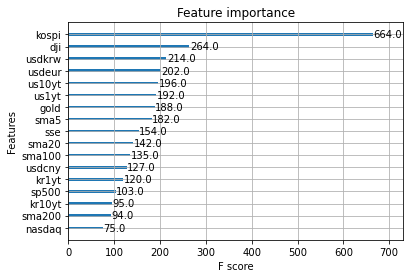

In [231]:
xgboost.plot_importance(xgb_model)

In [232]:
predictions = xgb_model.predict(X_test)
predictions

array([1948.2994, 1948.2994, 1893.9005, 1898.7645, 1934.9624, 1928.5223,
       1944.1686, 1944.1686, 1943.959 , 1949.3225, 1930.0947, 1946.2313,
       1928.9988, 1932.8435, 1932.8435, 1932.8435, 1947.898 ],
      dtype=float32)

In [233]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 386.5713315376448
rmse : 19.661417332879257


In [234]:
xgb_model.fit(scaled_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [235]:
predictions = xgb_model.predict(scaled_X_test)
predictions

array([1949.043 , 1949.043 , 1895.0642, 1899.8265, 1935.8031, 1929.2562,
       1944.9081, 1944.9081, 1944.7037, 1952.0101, 1930.8191, 1948.625 ,
       1930.2811, 1934.8173, 1934.8173, 1934.8173, 1950.3176],
      dtype=float32)

In [236]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 395.4530892467484
rmse : 19.886002344532407


- 3-2) XGBRegressor with GridSearchCV

In [237]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [238]:
# Various hyper-parameters to tune

xgb1 = XGBRegressor()
parameters = {'nthread':[3], # when use hyperthread, xgboost may become slower
              'learning_rate': [0.05, 0.07, 0.09],
              'max_depth': [3, 4, 5],
              'min_child_weight': [3, 4, 5],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50, 100, 200, 300, 400, 500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [239]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.697536969507261
{'colsample_bytree': 0.7, 'learning_rate': 0.09, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 3, 'subsample': 0.7}


In [240]:
predictions = xgb_grid.predict(X_test)
predictions

array([1953.1052, 1953.1052, 1906.8422, 1912.1912, 1939.4508, 1940.6718,
       1947.9178, 1949.2211, 1949.784 , 1955.6608, 1932.5372, 1949.042 ,
       1938.1467, 1941.6587, 1941.6587, 1941.6587, 1951.2344],
      dtype=float32)

In [241]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 430.3557969727576
rmse : 20.74501860622828


In [242]:
xgb_grid.fit(scaled_X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [243]:
predictions = xgb_grid.predict(scaled_X_test)
predictions

array([1953.8383, 1953.8383, 1904.5786, 1904.5786, 1931.9513, 1931.9513,
       1941.2294, 1942.5326, 1942.5326, 1942.6115, 1925.4141, 1938.972 ,
       1927.3774, 1933.001 , 1933.001 , 1933.001 , 1942.6115],
      dtype=float32)

In [244]:
mse = mean_squared_error(y_test, predictions)
print('mse :', mse)
print('rmse :', math.sqrt(mse))

mse : 398.78603694224927
rmse : 19.96962786188689


- 3-3) LSTM

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [246]:
scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = truncated_df.columns.tolist()

# 스케일 후 columns
scaled = scaler.fit_transform(truncated_df)
scaled

array([[0.19738723, 0.03733059, 0.03914418, ..., 0.06691577, 0.        ,
        0.        ],
       [0.20910964, 0.04517909, 0.04671323, ..., 0.07027643, 0.00169014,
        0.00259082],
       [0.20426987, 0.04457804, 0.04820674, ..., 0.07360268, 0.00328165,
        0.00510724],
       ...,
       [0.41176625, 0.70470588, 0.77895726, ..., 0.35466023, 0.32775542,
        0.54055641],
       [0.4203849 , 0.75061339, 0.8171241 , ..., 0.35482008, 0.32445824,
        0.53974812],
       [0.4585244 , 0.73095514, 0.80402104, ..., 0.35656949, 0.3218355 ,
        0.53923035]])

In [247]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [248]:
# # Normalization 미적용

# df = truncated_df.copy()
# df

In [249]:
X_train, X_test, y_train, y_test = train_test_split(df, \
    df['kospi'], test_size=0.2, random_state=0, shuffle=False)

In [250]:
X_train.shape, y_train.shape

((2717, 21), (2717,))

In [251]:
X_test.shape, y_test.shape

((680, 21), (680,))

In [252]:
X_train

,kospi,dji,sp500,usdkrw,usdeur,usdcny,gold,kr1yt,kr10yt,us1yt,...,nasdaq,sse,sma5,sma20,sma100,sma200,ema5,ema20,ema100,ema200
0,0.197387,0.037331,0.039144,0.595745,0.082206,0.690874,0.054231,0.882507,0.996310,0.031300,...,0.022958,0.048770,0.146207,0.066916,0.000000,0.000000,0.146207,0.066916,0.000000,0.000000
1,0.209110,0.045179,0.046713,0.534663,0.066944,0.692193,0.081049,0.906005,1.000000,0.034469,...,0.028041,0.052869,0.148216,0.070276,0.001690,0.002591,0.148216,0.070276,0.001690,0.002591
2,0.204270,0.044578,0.048207,0.497436,0.074922,0.690698,0.081526,0.906005,0.988930,0.030507,...,0.028079,0.058197,0.151670,0.073603,0.003282,0.005107,0.151670,0.073603,0.003282,0.005107
3,0.217158,0.044662,0.048469,0.455651,0.067291,0.691577,0.102741,0.898172,0.992620,0.026149,...,0.027092,0.065984,0.155964,0.077369,0.005088,0.007559,0.155964,0.077369,0.005088,0.007559
4,0.197983,0.046332,0.050394,0.489839,0.083593,0.691841,0.099404,0.895561,0.977860,0.024168,...,0.026958,0.054508,0.156094,0.078995,0.006302,0.009671,0.156094,0.078995,0.006302,0.009671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,0.761466,0.734205,0.717470,0.401861,0.629206,0.509759,0.244100,0.481723,0.471402,0.713154,...,0.701390,0.677254,0.771689,0.831774,0.924732,0.975997,0.771689,0.831774,0.924732,0.975997
2713,0.761466,0.734205,0.717470,0.401861,0.629206,0.509759,0.244100,0.481723,0.471402,0.713154,...,0.701390,0.677254,0.765644,0.825134,0.922806,0.975292,0.765644,0.825134,0.922806,0.975292
2714,0.761466,0.734205,0.717470,0.401861,0.629206,0.509759,0.244100,0.481723,0.471402,0.709984,...,0.701390,0.677254,0.760923,0.817511,0.921778,0.974575,0.760923,0.817511,0.921778,0.974575
2715,0.713603,0.736005,0.720998,0.416448,0.640652,0.551081,0.228844,0.481723,0.466974,0.755151,...,0.708818,0.654713,0.747501,0.807068,0.920132,0.973575,0.747501,0.807068,0.920132,0.973575


In [253]:
import tensorflow as tf

https://webnautes.tistory.com/1527

In [254]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=7, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [255]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [256]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [257]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [259]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=12,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [260]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [261]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [262]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100


2022-06-15 17:03:49.290888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-15 17:03:49.427662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


     11/Unknown - 1s 11ms/step - loss: 0.1107 - mse: 0.2213

2022-06-15 17:03:49.500477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


     13/Unknown - 1s 17ms/step - loss: 0.1073 - mse: 0.2145
Epoch 00001: val_loss improved from inf to 0.07524, saving model to tmp/ckeckpointer.ckpt
13/13 [==============================] - 1s 41ms/step - loss: 0.1073 - mse: 0.2145 - val_loss: 0.0752 - val_mse: 0.1505


2022-06-15 17:03:49.902014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-15 17:03:49.953730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
11/13 [========================>.....] - ETA: 0s - loss: 0.0420 - mse: 0.0839
Epoch 00002: val_loss improved from 0.07524 to 0.01571, saving model to tmp/ckeckpointer.ckpt
13/13 [==============================] - 0s 15ms/step - loss: 0.0401 - mse: 0.0802 - val_loss: 0.0157 - val_mse: 0.0314
Epoch 3/100
11/13 [========================>.....] - ETA: 0s - loss: 0.0062 - mse: 0.0125
Epoch 00003: val_loss improved from 0.01571 to 0.00263, saving model to tmp/ckeckpointer.ckpt
13/13 [==============================] - 0s 15ms/step - loss: 0.0059 - mse: 0.0119 - val_loss: 0.0026 - val_mse: 0.0053
Epoch 4/100
11/13 [========================>.....] - ETA: 0s - loss: 0.0040 - mse: 0.0081
Epoch 00004: val_loss did not improve from 0.00263
13/13 [==============================] - 0s 13ms/step - loss: 0.0040 - mse: 0.0080 - val_loss: 0.0030 - val_mse: 0.0059
Epoch 5/100
11/13 [========================>.....] - ETA: 0s - loss: 0.0026 - mse: 0.0052
Epoch 00005: val_loss improved from 0.002

In [263]:
model.load_weights(filename)

In [264]:
pred = model.predict(test_data)

2022-06-15 17:04:11.393226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-15 17:04:11.436881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [265]:
pred.shape

(95, 1)

In [266]:
test = []
for i, value in enumerate(y_test):
    if (i+1) % 7 == 0:
        test.append(value)

In [267]:
test = test[1:]
print(len(test))

96


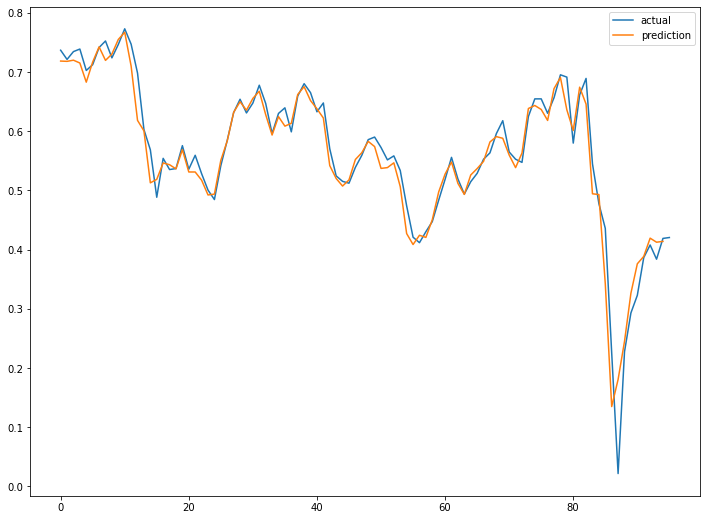

In [268]:
plt.figure(figsize=(12, 9))
# plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()